<a href="https://colab.research.google.com/github/jennermaxim/machine_learning/blob/main/Web_Ad_Optimization_Upper_Confidence_Bound_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WebAd_dataset.xlsx to WebAd_dataset.xlsx


Importing the dataset

In [3]:
dataset = pd.read_excel('WebAd_dataset.xlsx')
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


Upper Confidence Bound

In [4]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads
sums_of_rewards_of_each_ads = [0] * no_of_Ads
total_reward = 0
for n in range(0, observations):
  ad = 0
  max_upper_bound = 0
  for i in range(0, no_of_Ads):
    if(numbers_of_selections_of_each_ads[i] > 0):
      average_reward = sums_of_rewards_of_each_ads[i] /numbers_of_selections_of_each_ads[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_ads[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + i
  reward = dataset.values[n, ad]
  sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
  total_reward = total_reward + reward

print("Rewards by Ads = ", sums_of_rewards_of_each_ads)
print("Total Rewards by UCB = ", total_reward)
print("Ads selected at each round: ", ads_selected)

Rewards by Ads =  [206, 108, 36, 116, 626, 8, 88, 251, 86, 27]
Total Rewards by UCB =  1552
Ads selected at each round:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 4, 1, 2, 3, 5, 6, 7, 8, 9, 0, 4, 0, 4, 1, 2, 3, 5, 6, 7, 8, 9, 4, 4, 0, 1, 2, 3, 5, 6, 7, 8, 9, 4, 1, 4, 0, 2, 3, 5, 6, 7, 8, 9, 1, 7, 4, 0, 2, 3, 5, 6, 8, 9, 4, 1, 6, 7, 0, 1, 0, 2, 3, 5, 8, 9, 4, 6, 7, 8, 1, 6, 7, 8, 0, 4, 2, 3, 5, 9, 1, 6, 7, 8, 4, 0, 1, 8, 2, 3, 5, 9, 6, 7, 4, 0, 1, 7, 8, 4, 2, 3, 5, 9, 6, 0, 1, 7, 8, 4, 2, 3, 5, 9, 6, 4, 0, 1, 7, 8, 8, 8, 2, 3, 5, 9, 6, 4, 0, 1, 6, 7, 8, 2, 3, 5, 9, 4, 0, 1, 6, 7, 8, 2, 3, 5, 9, 4, 0, 1, 6, 7, 0, 8, 4, 2, 3, 5, 9, 2, 1, 6, 7, 0, 8, 4, 3, 5, 9, 2, 5, 1, 6, 7, 0, 8, 4, 3, 9, 2, 5, 1, 6, 7, 0, 7, 8, 4, 2, 5, 3, 3, 9, 2, 1, 6, 0, 7, 8, 4, 2, 3, 3, 5, 1, 6, 9, 0, 7, 7, 8, 8, 4, 1, 6, 2, 3, 0, 5, 7, 9, 8, 4, 0, 1, 6, 7, 2, 3, 3, 3, 8, 5, 4, 4, 9, 7, 8, 0, 3, 3, 1, 6, 4, 2, 4, 5, 4, 4, 9, 8, 3, 7, 0, 0, 1, 6, 4, 2, 5, 9, 8, 0,

Visualizing Result

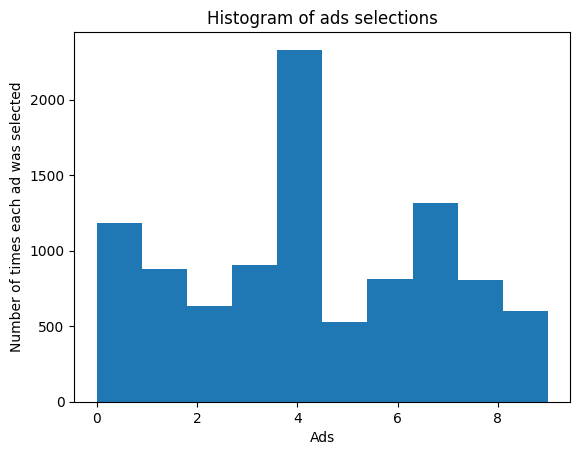

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

https://github.com/jennermaxim/machine_learning